In [167]:
import yfinance as yf 
import pdb
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras.backend as K
import matplotlib.ticker as mtick
from statsmodels.tsa.seasonal import seasonal_decompose

In [168]:
def read_data(x):
    train_data = yf.download(x,'2016-01-01','2019-01-03') 
    validation_data_1 = yf.download(x,'2019-01-03','2019-02-01')
    validation_data_2 = yf.download(x,'2019-01-03','2019-03-01')
    validation_data_3 = yf.download(x,'2019-01-03','2019-04-01')
    validation_data_4 = yf.download(x,'2019-01-03','2019-05-01') 
    validation_data_5 = yf.download(x,'2019-01-03','2019-06-01')
    validation_data_6 = yf.download(x,'2019-01-03','2019-07-01')
    validation_data_7 = yf.download(x,'2019-01-03','2019-08-01')
    return train_data,validation_data_1,validation_data_2,\
                validation_data_3,validation_data_4,validation_data_5,\
                validation_data_6,validation_data_7

In [169]:
def data_analysis(df,data_):
    plt.figure()
    plt.plot(df["Open"])
    plt.plot(df["High"])
    plt.plot(df["Low"])
    plt.plot(df["Close"])
    plt.title('Google stock price history '+'('+data_+')')
    plt.ylabel('Price (USD)')
    plt.xlabel('Days')
    plt.legend(['Open','High','Low','Close'], loc='upper left')
    plt.show()

In [171]:
train_data,validation_data_1,validation_data_2,validation_data_3,\
        validation_data_4,validation_data_5,\
        validation_data_6,validation_data_7 = read_data('GOOG') 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


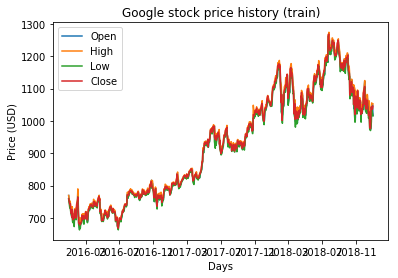

In [172]:
data_analysis(train_data,'train')

In [173]:
def lstm (X_train,y_train):
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    opt = keras.optimizers.Adam(lr=0.0001)
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)
    print(K.eval(regressor.optimizer.lr))
    return (regressor)

In [174]:
def transform_train(dataset_train):
    global sc
    sc = MinMaxScaler(feature_range=(0,1))
    training_set = dataset_train.iloc[:, 1:2].values
    training_set_scaled = sc.fit_transform(training_set)
    X_train = []
    y_train = []
    for i in range(30, len(training_set_scaled)):
        X_train.append(training_set_scaled[i-30:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train,y_train

In [175]:
def transform_test(dataset_train,dataset_test,regressor,num_days):
    dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(30, 30+num_days):
        X_test.append(inputs[i-30:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    return (predicted_stock_price)

In [176]:
def mean_squared_error_array(ser1,ser2):
    pdb.set_trace
    return(sqrt(mean_squared_error(ser1, ser2)))

In [177]:
X_train,y_train = transform_train(train_data)
regressor = lstm(X_train,y_train )

Epoch 1/30
726/726 [==============================] - 10s 14ms/step - loss: 0.0679
Epoch 2/30
726/726 [==============================] - 3s 5ms/step - loss: 0.0095
Epoch 3/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0069
Epoch 4/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0066
Epoch 5/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0058
Epoch 6/30
726/726 [==============================] - 4s 5ms/step - loss: 0.0062
Epoch 7/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0056
Epoch 8/30
726/726 [==============================] - 3s 5ms/step - loss: 0.0060A: 1s - l
Epoch 9/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0059
Epoch 10/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0055
Epoch 11/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0055
Epoch 12/30
726/726 [==============================] - 3s 4ms/step - loss: 0.0060
Epoch 13/30
72

In [178]:
predicted_stm_val1 = transform_test(train_data,validation_data_1,regressor,num_days = len(validation_data_1))
predicted_stm_val2 = transform_test(train_data,validation_data_2,regressor,num_days = len(validation_data_2))
predicted_stm_val3 = transform_test(train_data,validation_data_3,regressor,num_days = len(validation_data_3))
predicted_stm_val4 = transform_test(train_data,validation_data_4,regressor,num_days = len(validation_data_4))
predicted_stm_val5 = transform_test(train_data,validation_data_5,regressor,num_days = len(validation_data_5))
predicted_stm_val6 = transform_test(train_data,validation_data_6,regressor,num_days = len(validation_data_6))
predicted_stm_val7 = transform_test(train_data,validation_data_7,regressor,num_days = len(validation_data_7))

In [179]:
lstm_error_1 = mean_squared_error_array(predicted_stm_val1,validation_data_1['Open'])
lstm_error_2 = mean_squared_error_array(predicted_stm_val2,validation_data_2['Open'])
lstm_error_3 = mean_squared_error_array(predicted_stm_val3,validation_data_3['Open'])
lstm_error_4 = mean_squared_error_array(predicted_stm_val4,validation_data_4['Open'])
lstm_error_5 = mean_squared_error_array(predicted_stm_val5,validation_data_5['Open'])
lstm_error_6 = mean_squared_error_array(predicted_stm_val6,validation_data_6['Open'])
lstm_error_7 = mean_squared_error_array(predicted_stm_val7,validation_data_7['Open'])

In [180]:
print("RMSE for predicting 1 month at a time using LSTM " +str(lstm_error_1))
print("RMSE for predicting 2 months at a time using LSTM " +str(lstm_error_2))
print("RMSE for predicting 3 months at a time using LSTM " +str(lstm_error_3))
print("RMSE for predicting 4 months at a time using LSTM " +str(lstm_error_4))
print("RMSE for predicting 5 months at a time using LSTM " +str(lstm_error_5))
print("RMSE for predicting 6 months at a time using LSTM " +str(lstm_error_6))
print("RMSE for predicting 7 months at a time using LSTM " +str(lstm_error_7))

RMSE for predicting 1 month at a time using LSTM 20.892178878699834
RMSE for predicting 2 months at a time using LSTM 19.452754632354562
RMSE for predicting 3 months at a time using LSTM 24.791536483613154
RMSE for predicting 4 months at a time using LSTM 26.270704843477883
RMSE for predicting 5 months at a time using LSTM 30.36369119867311
RMSE for predicting 6 months at a time using LSTM 33.66060968650825
RMSE for predicting 7 months at a time using LSTM 34.0959112558654


In [181]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 30, 50)            10400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 30, 50)            20200     
_________________________________________________________________
dropout_15 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                20200     
__________

# Building an ARIMA Model using ATUO-ARIMA

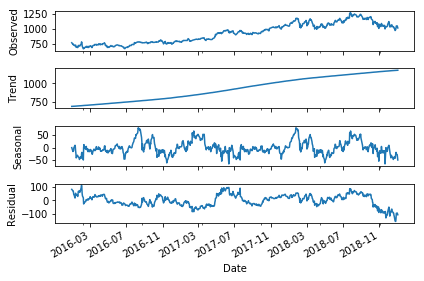

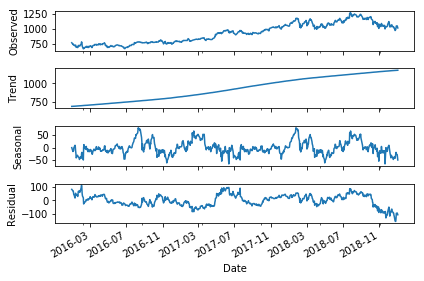

In [182]:
from stldecompose import decompose, forecast
decomp = decompose(train_data['Open'], period=365)
decomp.plot()

ADF = -12.109947084996097
p-value = 1.9296874643169388e-22


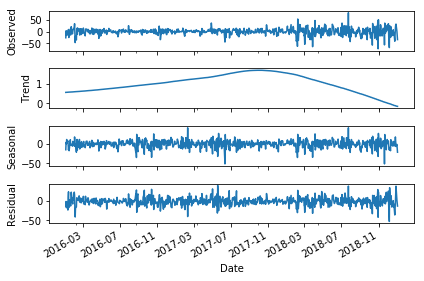

In [183]:
x = train_data['Open'].diff()
decomp = decompose(x[1:], period=365)
decomp.plot()
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(x[1:])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))

In [184]:
from pyramid.arima import auto_arima
arima_model = auto_arima(train_data['Open'], trace=True, error_action='ignore', suppress_warnings=True)
arima_model.fit(train_data['Open'])

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6169.689, BIC=6197.449, Fit time=1.890 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6188.667, BIC=6197.920, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6184.301, BIC=6198.181, Fit time=0.258 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6184.210, BIC=6198.090, Fit time=0.248 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6184.581, BIC=6207.715, Fit time=0.669 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6180.185, BIC=6212.572, Fit time=1.915 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=6179.492, BIC=6211.879, Fit time=1.624 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6186.203, BIC=6204.710, Fit time=0.308 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

ACF and PACF plots


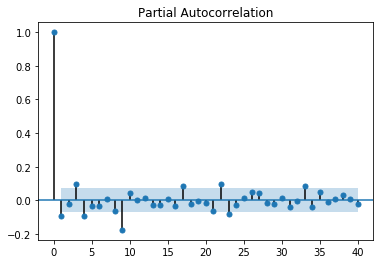

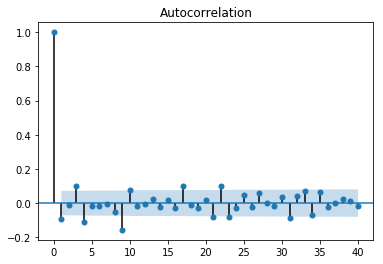

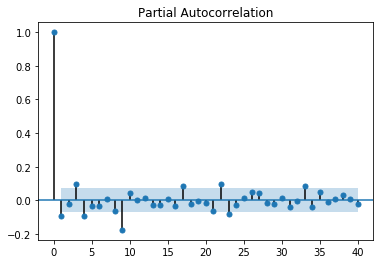

In [185]:
#Verifying Auto-Arima model

import statsmodels.api as sm
x = train_data['Open'].diff()
print('ACF and PACF plots')
sm.graphics.tsa.plot_acf(x[1:], lags=40)
sm.graphics.tsa.plot_pacf(x[1:], lags=40)


In [186]:
forecast_val_1 = arima_model.predict(n_periods=len(validation_data_1))
forecast_val_2 = arima_model.predict(n_periods=len(validation_data_2))
forecast_val_3 = arima_model.predict(n_periods=len(validation_data_3))
forecast_val_4 = arima_model.predict(n_periods=len(validation_data_4))
forecast_val_5 = arima_model.predict(n_periods=len(validation_data_5))
forecast_val_6 = arima_model.predict(n_periods=len(validation_data_6))
forecast_val_7 = arima_model.predict(n_periods=len(validation_data_7))

C:\Users\Asrith Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Asrith Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Asrith Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
C:\Users\Asrith Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_in

In [187]:
arima_error_1 = mean_squared_error_array(forecast_val_1,validation_data_1['Open'])
arima_error_2 = mean_squared_error_array(forecast_val_2,validation_data_2['Open'])
arima_error_3 = mean_squared_error_array(forecast_val_3,validation_data_3['Open'])
arima_error_4 = mean_squared_error_array(forecast_val_4,validation_data_4['Open'])
arima_error_5 = mean_squared_error_array(forecast_val_5,validation_data_5['Open'])
arima_error_6 = mean_squared_error_array(forecast_val_6,validation_data_6['Open'])
arima_error_7 = mean_squared_error_array(forecast_val_7,validation_data_7['Open'])

In [188]:
print("RMSE for predicting 1 month at a time using ARIMA " +str(arima_error_1))
print("RMSE for predicting 2 months at a time using ARIMA " +str(arima_error_2))
print("RMSE for predicting 3 months at a time using ARIMA " +str(arima_error_3))
print("RMSE for predicting 4 months at a time using ARIMA " +str(arima_error_4))
print("RMSE for predicting 5 months at a time using ARIMA " +str(arima_error_5))
print("RMSE for predicting 6 months at a time using ARIMA " +str(arima_error_6))
print("RMSE for predicting 7 months at a time using ARIMA " +str(arima_error_7))

RMSE for predicting 1 month at a time using ARIMA 21.692313392569904
RMSE for predicting 2 months at a time using ARIMA 21.283624023818295
RMSE for predicting 3 months at a time using ARIMA 32.202191491414794
RMSE for predicting 4 months at a time using ARIMA 42.54234907679813
RMSE for predicting 5 months at a time using ARIMA 43.04211264627024
RMSE for predicting 6 months at a time using ARIMA 62.99097951208478
RMSE for predicting 7 months at a time using ARIMA 65.87028192022908


In [189]:
def plot_erros(list_erors,mode_):
    plt.plot(list_erors)
    plt.title('Predicted RMSE for each month using '+mode_)
    plt.ylabel('RMSE')
    plt.xlabel('months')
    plt.show()

In [190]:
lstm_error_list = [lstm_error_1,lstm_error_2,lstm_error_3,
                   lstm_error_4,lstm_error_5,lstm_error_6,lstm_error_7]

arima_error_list = [arima_error_1,arima_error_2,arima_error_3,
                    arima_error_4,arima_error_5,arima_error_6,arima_error_7]

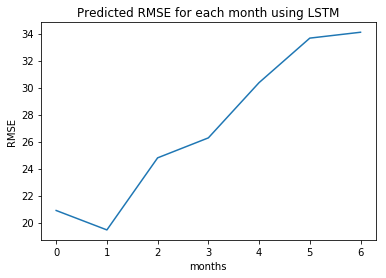

In [191]:
plot_erros(lstm_error_list,'LSTM')

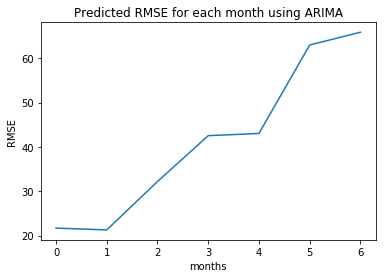

In [192]:
plot_erros(arima_error_list,'ARIMA')

In [194]:
def two_errors_plota(lstm_error_list,arima_error_list):
    plt.plot(lstm_error_list)
    plt.plot(arima_error_list)
    plt.legend(['LSTM','ARIMA'])
    plt.title('Comparision of RMSE for each month using ARIMA and LSTM')
    plt.ylabel('RMSE')
    plt.xlabel('months')
    plt.show()
    

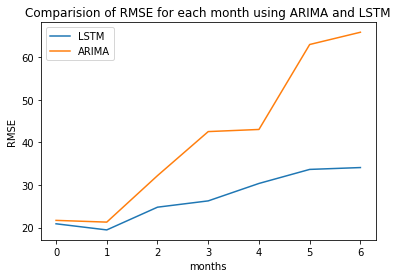

In [195]:
two_errors_plota(lstm_error_list,arima_error_list)

In [196]:
def predicted_values(original_df,lstm_values,arima_values,month):
    plt.plot(original_df['Open'].to_list())
    plt.plot(lstm_values)
    plt.plot(arima_values)
    plt.legend(['ORIGINAL','LSTM','ARIMA'])
    plt.title('Comparision of predicted values for '+str(month) +'months using ARIMA & LSTM with Original values')
    plt.ylabel('Stock Price')
    plt.xlabel('Dates')
    plt.show()
    

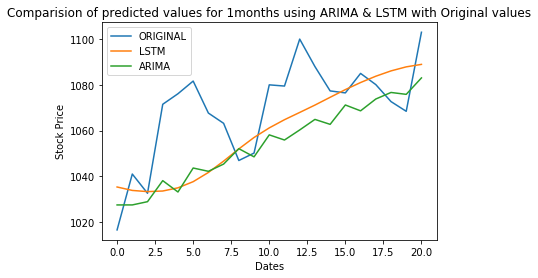

In [197]:
predicted_values(validation_data_1,predicted_stm_val1,forecast_val_1,1)

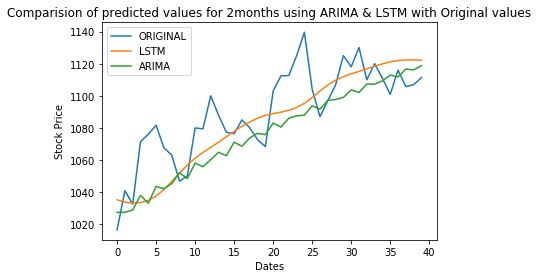

In [198]:
predicted_values(validation_data_2,predicted_stm_val2,forecast_val_2,2)

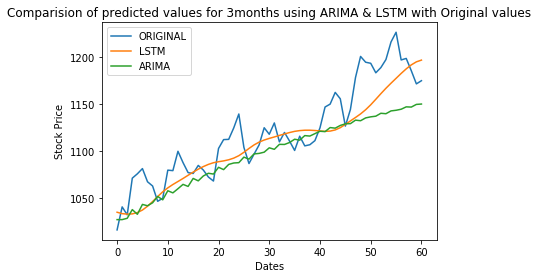

In [199]:
predicted_values(validation_data_3,predicted_stm_val3,forecast_val_3,3)

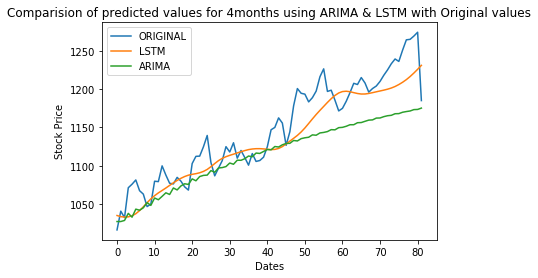

In [200]:
predicted_values(validation_data_4,predicted_stm_val4,forecast_val_4,4)

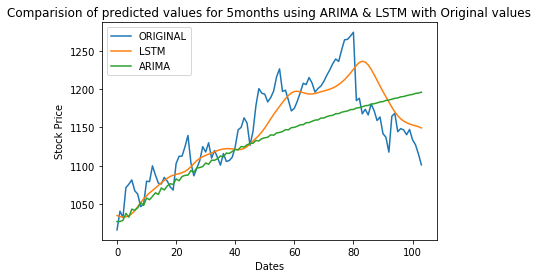

In [201]:
predicted_values(validation_data_5,predicted_stm_val5,forecast_val_5,5)

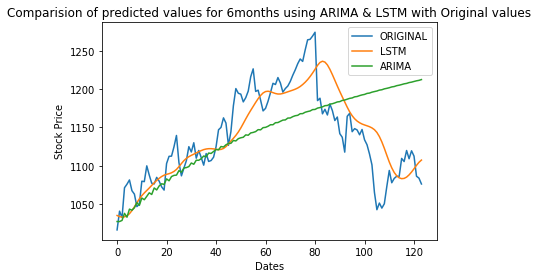

In [202]:
predicted_values(validation_data_6,predicted_stm_val6,forecast_val_6,6)

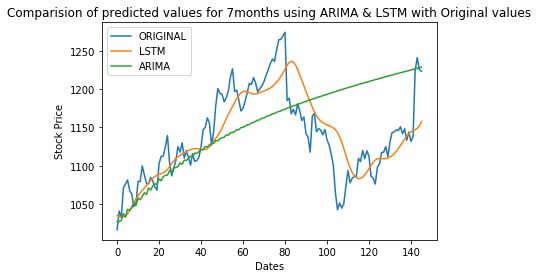

In [203]:
predicted_values(validation_data_7,predicted_stm_val7,forecast_val_7,7)